# Sentiment Flow – Understanding Sentiments expressed on Twitter about Apple and Google Products using NLP

 ## 1. Business Understanding

### 1.1 Introduction 
In an era where public opinion on products can shape brand perception, companies increasingly rely on Natural Language Processing (NLP) for real-time customer feedback analysis. This project, applies NLP techniques to classify Twitter sentiment related to Apple and Google products, addressing a real-world need for understanding public sentiment in a rapidly evolving market. By using sentiment polarity classification,it provides actionable insights into customer satisfaction and emerging issues, enabling companies, marketing teams, and decision-makers to make data-driven decisions. These insights help brands like Apple and Google improve products, refine customer support strategies, and optimize marketing efforts based on social media sentiment.


### 1.2 Problem Statement
The problem is to accurately classify the sentiment of tweets related to __Apple and Google products__. We want to determine whether a tweet expresses a positive, negative, or neutral sentiment. This classification can help companies understand customer satisfaction, identify potential issues, and tailor their responses accordingly.

### 1.3 Stakeholders 
- __The companies__: Apple & Google- Considering these companies are direcly affected by the sentiment, it is important for them to gauge the perception of their products so as to identify the areas of improvement.

- __Marketing teams__- this sentiment analysis and model can help them respond to negative feedback, adjust their marketing campaigns and highlight the positive aspects of their products.

- __The customer support teams &decision makers__- the sentiment analysis is important for they can use it to improve product development, customer support and brand reputation.

### 1.4  Business Value
By accurately classifying tweets, our NLP model provides actionable insights to stakeholders. For example:

- Identifying negative sentiment can help companies address issues promptly.
- Recognizing positive sentiment can guide marketing efforts and reinforce successful strategies.
- Understanding neutral sentiment can provide context and balance.

### 1.5 Objectives 
##### Main Objective

To develop a NLP (Natural Language Processing) multiclass classification model for sentiment analysis, aim to achieve a __recall score of 80%__ and an __accuracy of 80%__. The model should categorize sentiments into three classes: __Positive__, __Negative__, and __Neutral__.

##### Specific Objectives

- To idenitfy the most common words used in the dataset using Word cloud.

- To confirm the most common words that are positively and negatively tagged.

- To recognize the products that have been opined by the users.

- To spot the distribution of the sentiments.

### 1.6 Conclusion 
Our NLP model will contribute valuable insights to the real-world problem of understanding Twitter sentiment about Apple and Google products. Stakeholders can leverage this information to enhance their decision-making processes and improve overall customer satisfaction.

## 2. Data Understanding

### 2.1 Data source
The dataset originates from __CrowdFlower via data.world__. Contributors evaluated tweets related to various brands and products. Specifically:

- Each tweet was labeled as expressing __positive__, __negative__, __no emotion__ or __can't tell__ toward a brand or product.
- If emotion was expressed, contributors specified which brand or product was the target.

### 2.2 Suitability of the Data
Here's why this dataset is suitable for our project:

- __Relevance__: The data directly aligns with our business problem of understanding Twitter sentiment for Apple and Google products.
- __Real-World Context__: The tweets represent actual user opinions, making the problem relevant in practice.
- __Multiclass Labels__: We can build both binary (positive/negative) and multiclass (positive/negative/neutral) classifiers using this data.

### 2.3 Dataset Size
The dataset contains __over 9,000 labeled tweets__. We'll explore its features to gain insights.

### 2.4 Descriptive Statistics
- __tweet_text__: The content of each tweet.
- __is_there_an_emotion_directed_at_a_brand_or_product__: No emotion toward brand or product, Positive emotion, Negative emotion, I can't tell
- __emotion_in_tweet_is_directed_at__: The brand or product mentioned in the tweet.

### 2.5 Feature Selection
__Tweet text__ is the primary feature. The emotion label and target brand/product are essential for classification.

### 2.6 Data Limitations
- __Label Noise__: Human raters' subjectivity may introduce noise.
- __Imbalanced Classes__: We'll address class imbalance during modeling.
- __Contextual Challenges__: Tweets are often short and context-dependent.
- __Incomplete & Missing Data__: Could affect the overall performance of the models.

## 3. Data Loading

### 3.1 Importing Necessary Modules


In [ ]:
# Data manipulation
import pandas as pd
import numpy as np
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer


# Download required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# sklearn
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# wordCloud
from wordcloud import WordCloud

# pickle
import pickle

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
#loading dataset

file_path = r"C:\Users\PC\Documents\Flatiron\dsc-data-science-env-config\Phase_5_capstone_project\judge_tweet_product_company.csv"
# Our dataset contains special characters or a non-standard encoding.
# We solved this by reading the file using different encoding "ISO-8859-1"
data= pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows to understand the structure
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
# Checking data information
print("INFO")
print("-" * 4)
data.info()


INFO
----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [4]:
# Find the shape of the DataFrame
data_shape = data.shape

# Print the shape
print("Data Shape:", data_shape)
print("Number of Rows:", data_shape[0])
print("Number of Columns:", data_shape[1])

Data Shape: (9093, 3)
Number of Rows: 9093
Number of Columns: 3


In [5]:
# Unique Values
print("\n\nUNIQUE VALUES")
print("-" * 12)
for col in data.columns:
    print(f"Column *{col}* has {data[col].nunique()} unique values")
    if data[col].nunique() < 12:
        print(f"Top unique values in the *{col}* include:")
        for idx in data[col].value_counts().index:
            print(f"- {idx}")
    print("")



UNIQUE VALUES
------------
Column *tweet_text* has 9065 unique values

Column *emotion_in_tweet_is_directed_at* has 9 unique values
Top unique values in the *emotion_in_tweet_is_directed_at* include:
- iPad
- Apple
- iPad or iPhone App
- Google
- iPhone
- Other Google product or service
- Android App
- Android
- Other Apple product or service

Column *is_there_an_emotion_directed_at_a_brand_or_product* has 4 unique values
Top unique values in the *is_there_an_emotion_directed_at_a_brand_or_product* include:
- No emotion toward brand or product
- Positive emotion
- Negative emotion
- I can't tell



In [6]:
# Missing or Null Values
print("\nMISSING VALUES")
print("-" * 15)
for col in data.columns:
    print(f"Column *{col}* has {data[col].isnull().sum()} missing values.")


MISSING VALUES
---------------
Column *tweet_text* has 1 missing values.
Column *emotion_in_tweet_is_directed_at* has 5802 missing values.
Column *is_there_an_emotion_directed_at_a_brand_or_product* has 0 missing values.


In [ ]:
# Duplicate Values
print("\n\nDUPLICATE VALUES")
print("-" * 16)
print(f"The dataset has {data.duplicated().sum()} duplicated records.")

Comments:

1. All the columns are in the correct data types.

2. The columns will need to be renamed.

3. Features with missing values should be renamed from NaN.

4. Duplicate records should be dropped.

5. All records with the target as "I can't tell" should be dropped.

6. Corrupted records should be removed.

7. Rename values in the is_there_an_emotion_directed_at_a_brand_or_product where the value is 'No emotion toward brand or product' to 'Neutral Emotion'

## 4.Data Cleaning & Feature Engineering

### 4.1 Checking the validity of data


#### 4.1.1 Corrupted data at the *tweet_text* column
There may be an issue of corrupted data in some records. To address this, we create a function that identifies these records and returns their indexes. Corrupted data often includes non-ASCII characters, which may indicate unexpected special symbols, foreign language characters, or encoding issues that do not fit the expected data format. Detecting and removing these records is especially important when working with systems or processes that support only ASCII characters, as non-ASCII characters can cause errors or misinterpretations. By using the identified indexes, we can remove the corrupted records from the working DataFrame, ensuring consistency and compatibility in the dataset.

In [7]:
# A function targeting corrupted records
def is_corrupted(tweet):
    """This func returns the index of any record that is corrupted"""
    corrupted_cols = []
    for key, text in enumerate(tweet):
        if any(ord(char) > 127 for char in str(text)) == True:
            corrupted_cols.append(key)
    return corrupted_cols

In [8]:
# Applying the is_corrupted function to find the indexes of the corrupted records
corrupted_records_idx = is_corrupted(data['tweet_text'])

In [9]:
# Test to check if the function worked as intended
if not data.loc[corrupted_records_idx].empty:
    tweet_text = data.loc[corrupted_records_idx]['tweet_text'].values[0]
    print(tweet_text)
else:
    print("No corrupted records found.")

@mention  - False Alarm: Google Circles Not Coming NowÛÒand Probably Not Ever? - {link} #Google #Circles #Social #SXSW


In [10]:
# Drop these records
data.drop(index=corrupted_records_idx, inplace=True)

In [11]:
# Test to ensure there are no corrupted records left
is_corrupted(data['tweet_text'])

[]

#### 4.1.2 Remove records in the *is_there_an_emotion_directed_at_a_brand_or_product* column where the value is "I can't tell."

In [12]:
# Identify records with the specified value
uncertain_reaction_idx = data[data['is_there_an_emotion_directed_at_a_brand_or_product'] == "I can't tell"].index

# Remove the identified records
data.drop(index=uncertain_reaction_idx, inplace=True)

# Test & verify removal
data[data['is_there_an_emotion_directed_at_a_brand_or_product'] == "I can't tell"]


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product


#### 4.1.3 Replace Fields in the *is_there_an_emotion_directed_at_a_brand_or_product* column where the value is "No emotion toward brand or product" to "Neutral emotion"

In [13]:
# Identify records with the specified value
neutral_reaction_idx = data[data['is_there_an_emotion_directed_at_a_brand_or_product'] ==\
                              "No emotion toward brand or product"].index

# Remove the identified records
data.loc[neutral_reaction_idx, 'is_there_an_emotion_directed_at_a_brand_or_product'] = "Neutral emotion"

# Test & verify the removal
data[data['is_there_an_emotion_directed_at_a_brand_or_product'] == "No emotion toward brand or product"]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product


### 4.2 Completeness of the data

#### 4.2.1 Drop Missing Values in the *tweet_text* column

In [14]:
tweet_missing = data[data['tweet_text'].isnull() == True].index
data.loc[tweet_missing]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
6,NaN,NaN,Neutral emotion


In [15]:
# Drop the record
data.drop(index=tweet_missing, inplace=True)

In [16]:
# Test & verify removal
data[data['tweet_text'].isnull() == True]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product


#### 4.2.2 Fill Missing Values in the *emotion_in_tweet_is_directed_at* column
This column has over 5000 missing values. This means that a tweet may have been written but the product not identified.  The best cause of action is to take missing values in *emotion_in_tweet_is_directed_at* and attempt to fill them based on the content of the tweet by identifying which product (if any) the tweet is directed at. If a product is not identified, it is assigned the unique value 'None' instead of dropping the rows


In [17]:
# Find the records with missing values in the column
data[data['emotion_in_tweet_is_directed_at'].isnull() == True].shape[0]

5331

In [18]:
# List of unique products/ services
products = list(data.emotion_in_tweet_is_directed_at.unique())
products.remove(np.nan) # Removes any np.nan items

def find_product(tweet):
    """This func takes in a tweet and returns the product talked about in the
    tweet; used to fill in the emotion_in_tweet_is_directed_at column"""
    for product in products:
        if str(product) in tweet or str(product).upper() in tweet \
            or  str(product).lower() in tweet or str(product).title() in tweet:
            return product

# Applying the function to find the index of records with missing values in the 2nd column
missing_products_idx = data[data['emotion_in_tweet_is_directed_at'].isnull() == True].index

In [19]:
# Replace the field where there are missing values in the emotion_in_tweet_is_directed_at column
data.loc[missing_products_idx, 'emotion_in_tweet_is_directed_at'] = data.loc[missing_products_idx, 'tweet_text']\
                                                                        .apply(lambda x: find_product(x))

In [20]:
# In case any field was not captured by our function, we can change it to 'None'
none_index = data[data['emotion_in_tweet_is_directed_at'].isnull()].index
data.loc[none_index, 'emotion_in_tweet_is_directed_at'] = 'None'
# df.loc[none_index]

In [21]:
# Check
data['emotion_in_tweet_is_directed_at'].value_counts()

iPad                               2273
Google                             1984
Apple                              1269
iPhone                             1093
None                                720
iPad or iPhone App                  448
Android                             284
Other Google product or service     278
Android App                          77
Other Apple product or service       33
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [22]:
# Number of values in the column are the same as the length of the data
np.sum(data['emotion_in_tweet_is_directed_at'].value_counts().values) == data.shape[0]

True

Observation: We were able to assign all tweets to a product and only 720 were not talking about a product explicitly.

### 4.3 Consistency : Dropping the duplicates

In [23]:
# Dropping the duplicates
data.drop_duplicates(inplace=True)

In [24]:
# Check if there is any remaining duplicate values
data.duplicated().sum()

0

### 4.4 Uniformity

#### 4.4.1 Renaming the columns

In [25]:
# Change the column names
data.rename(columns={'tweet_text': "tweet",
                  'emotion_in_tweet_is_directed_at':"product",
                  'is_there_an_emotion_directed_at_a_brand_or_product': "emotion"},
         inplace=True)

In [26]:
# Check
data.columns

Index(['tweet', 'product', 'emotion'], dtype='object')

#### 4.4.2 Reset the Index of the dataframe

In [27]:
# Reset the index
data.reset_index(inplace=True)
# Drop the old index column
data.drop(labels='index', axis=1, inplace=True)
data.head()

,tweet,product,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


### 4.5 Data Cleaning / Feature Engineering result
This is to verify the cleaning and feature engineering process worked


In [28]:
# INFO
print("INFO")
print("----")
print(data.info())

# SHAPE
print("\nSHAPE")
print("-----")
print(f"Records in dataset are {data.shape[0]} with {data.shape[1]} columns.")

# COLUMNS
print("\nCOLUMNS")
print("------")
print("Columns in the dataset are:")
for col in data.columns:
    print(f"- {col}")

 # UNIQUE VALUES
print("\nUNIQUE VALUES")
print("------------")
for col in data.columns:
    unique_values = data[col].nunique()
    print(f"Column *{col}* has {unique_values} unique values")
    if col == 'product' or col == 'emotion': 
        top_values = data[col].value_counts().index[:10].tolist()
        print(f"Top unique values in the *{col}* include:")
        for val in top_values:
            print(f"- {val}")

# MISSING VALUES
print("\nMISSING VALUES")
print("---------------")
for col in data.columns:
    missing_values = data[col].isnull().sum()
    print(f"Column *{col}* has {missing_values} missing values.")

# DUPLICATE VALUES
print("\nDUPLICATE VALUES")
print("----------------")
duplicate_count = data.duplicated().sum()
print(f"The dataset has {duplicate_count} duplicated records.")   

INFO
----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8439 entries, 0 to 8438
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tweet    8439 non-null   object
 1   product  8439 non-null   object
 2   emotion  8439 non-null   object
dtypes: object(3)
memory usage: 197.9+ KB
None

SHAPE
-----
Records in dataset are 8439 with 3 columns.

COLUMNS
------
Columns in the dataset are:
- tweet
- product
- emotion

UNIQUE VALUES
------------
Column *tweet* has 8434 unique values
Column *product* has 10 unique values
Top unique values in the *product* include:
- iPad
- Google
- Apple
- iPhone
- None
- iPad or iPhone App
- Android
- Other Google product or service
- Android App
- Other Apple product or service
Column *emotion* has 3 unique values
Top unique values in the *emotion* include:
- Neutral emotion
- Positive emotion
- Negative emotion

MISSING VALUES
---------------
Column *tweet* has 0 missing values.
Column *product* 

## 5. Data Visualizations

In [29]:
def plot_bar(feature, plot_type='bar'):
    """This function returns a bar or a barh plot"""
    labels = data[feature].value_counts(ascending=(plot_type == 'barh')).index
    values = data[feature].value_counts(ascending=(plot_type == 'barh')).values
    
    if plot_type == 'bar':
        plt.bar(x=labels, height=values)
        plt.ylabel("Count")
        plt.xlabel("Category")
    else:
        plt.barh(y=labels, width=values)
        plt.xlabel("Count")
        plt.ylabel("Categories")
    
    plt.title(f"Distribution of the {feature.title()} feature")
    plt.show()

### 5.1 Distribution of the *emotion* feature

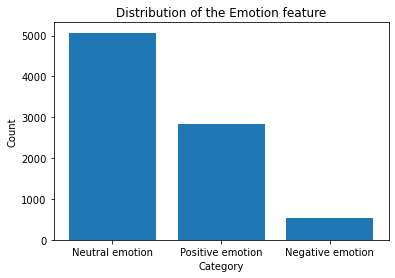

In [30]:
plot_bar('emotion')

The distribution shows a huge class imbalance between categories. The Neutral Emotion category holds over 50% of the data.

### 5.2 Distribution of the *product* feature

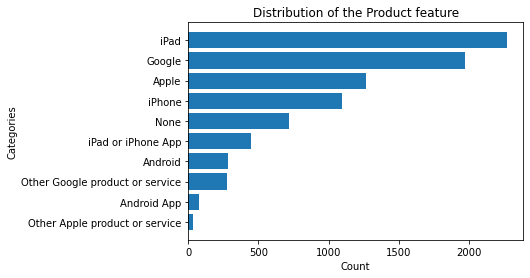

In [31]:
plot_bar('product', plot_type='barh')

The data reveals a high volume of sentiments related to the iPad, which is the most frequently mentioned product in this period, followed closely by sentiments concerning Google and Apple as companies.

Notably, there is also a 'None' category, indicating that a portion of the tweets do not pertain to the Apple or Google products initially targeted in this analysis. This may suggest discussions about other topics or products outside the original scope of the project.

## 6. Text preprocessing

Text processing is a crucial step in preparing raw text data for analysis or machine learning tasks, transforming unstructured text into a more meaningful and manageable format. This process typically includes several important steps:

1. Removing Punctuation: Unnecessary punctuation marks are removed to simplify the text and avoid introducing irrelevant tokens during analysis.

2. Tokenization: The text is split into individual words or phrases (tokens), enabling detailed examination of each component. Tokenization lays the groundwork for all further text processing tasks.

3. Converting to Lowercase: All characters are converted to lowercase to ensure uniformity and prevent duplicate tokens that only differ in case (e.g., "Apple" vs. "apple").

4. Removing Stop Words: Commonly used words (like "and," "is," "the") are filtered out, as they add minimal semantic value. Removing these words helps to focus on the most meaningful terms in the text.

5. Stemming and Lemmatization: Stemming reduces words to their root form by trimming suffixes (e.g., "running" to "run"), while lemmatization transforms words to their base or dictionary form based on context (e.g., "better" to "good"). This step ensures that different variations of a word are treated as a single term, improving consistency in text analysis.

Together, these preprocessing steps help create a cleaner, more structured version of the text, enhancing the accuracy and efficiency of downstream tasks, such as sentiment analysis, topic modeling, and classification.

In [32]:
# Initalize stop words
stop_words = set(stopwords.words('english') + ['sxsw', 'sxswi', 'link', 'rt'])
lemmatizer = WordNetLemmatizer()


Next step is to take the clean, tokenize, lammetize and filter the tweet texts 

In [33]:
def lemmatize_tweet(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags (keep the text after the #)
    text = re.sub(r'#', '', text)
    # Remove special characters like "&quot;"
    text = re.sub(r'&\w+;', '', text)
    # Remove punctuation
    text = "".join([char for char in text if char not in string.punctuation])
    # Tokenize text
    tokens = re.split('\W+', text.lower())
    # Remove stopwords and lemmatize the tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Remove extra white spaces
    tokens = [word.strip() for word in tokens if word.strip() != '']
    # Remove numbers
    tokens = [word for word in tokens if not word.isdigit()]
    # Tag parts of speech
    pos_tags = nltk.pos_tag(tokens)
    # Filter tokens to retain only nouns, adjectives, verbs, and adverbs
    important_pos = {'NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JJR', 'JJS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'RB', 'RBR', 'RBS'}
    tokens = [word for word, tag in pos_tags if tag in important_pos]
    return tokens

Now appliying the lemmatized_tweet function to the 'Tweet' column of the DataFrame 'data', creating a new column called 'lemmatized_tweet' with the processed tokens.

In [34]:
# Apply the clean_text function to the 'tweet' column
data['lemmatized_tweet'] = data['tweet'].apply(lambda x: lemmatize_tweet(x))

def join_text(tokens):
    """
    This function takes a list of tokens (words) and returns them as a single string.
    Each token is separated by a space.

    Parameters:
    tokens (list of str): A list of tokens to be joined.

    Returns:
    str: The tokens joined into a single string separated by spaces.
    """
    return " ".join(tokens)

data['clean_tweet'] = data['lemmatized_tweet'].apply(lambda x: join_text(x))


In [35]:
# Print the cleaned tweets
data.head()

,tweet,product,emotion,lemmatized_tweet,clean_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,"[iphone, hr, tweeting, riseaustin, dead, need,...",iphone hr tweeting riseaustin dead need upgrad...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,"[know, awesome, ipadiphone, app, youll, likely...",know awesome ipadiphone app youll likely appre...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,"[wait, ipad, also, sale]",wait ipad also sale
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,"[hope, year, festival, isnt, crashy, year, iph...",hope year festival isnt crashy year iphone app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,"[great, stuff, fri, mayer, google, tim, oreill...",great stuff fri mayer google tim oreilly tech ...


### 6.1 Visualizations for the tokenized tweets

In [36]:
def plot_fdist(sentiment=None, title="Frequency Distribution of Words", df=data):
    """
    Plots the frequency distribution of words in the dataset, optionally filtered by sentiment.
    """

    # Get lemmatized tweets based on sentiment filter
    lemmatized_tweet = df['lemmatized_tweet'] if sentiment is None else df[df['emotion'] == sentiment]['lemmatized_tweet']
    
    # Flatten the list of tokens
    all_tokens = [token for sublist in lemmatized_tweet for token in sublist]

    # Create and plot frequency distribution
    fdist = FreqDist(all_tokens)
    plt.figure(figsize=(10, 6))
    plt.title(title, fontsize=14)
    fdist.plot(30)


#### 6.1.1 Frequency Distribution of Lemmatized words

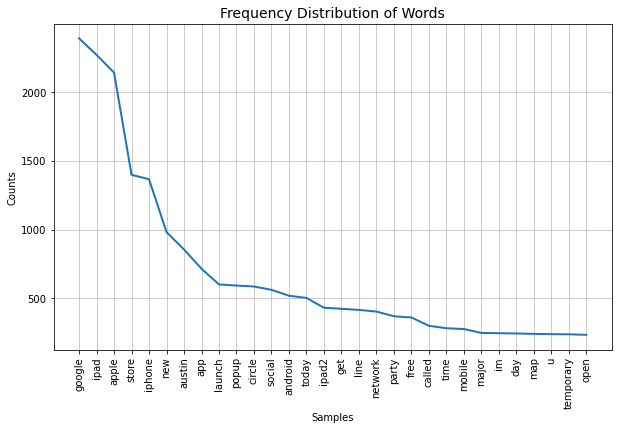

In [37]:
plot_fdist()

With respect to all the data, the words 'google', 'ipad', 'apple', 'store' and iphone appeared more frequently than all other words.

#### 6.1.2 Frequency Distribution of Lemmatized words categorized as Positive Emotion

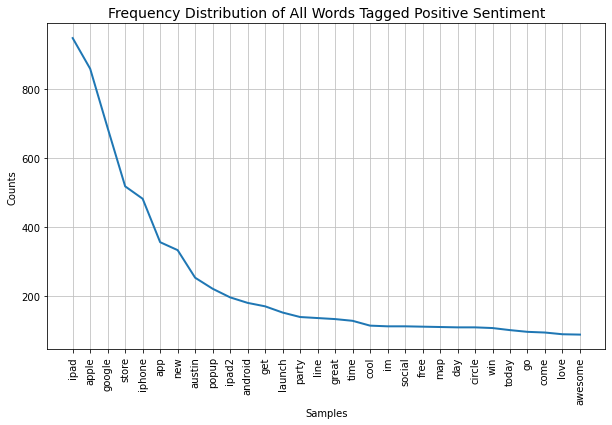

In [38]:
plot_fdist(sentiment="Positive emotion", title="Frequency Distribution of All Words Tagged Positive Sentiment")

- With respect to all the data categorised as 'positive', the words 'ipad', 'apple', 'google' and 'store' appeared more frequently than all other words.

- Other key positive words introduced in this section include "awesome", "love", "win", "cool", "great", "party"

- But were less than the counts recorded in the Neutral Frequency Distributions.

#### 6.1.3 Frequency Distribution of Lemmatized words categorized as Neutral Emotion

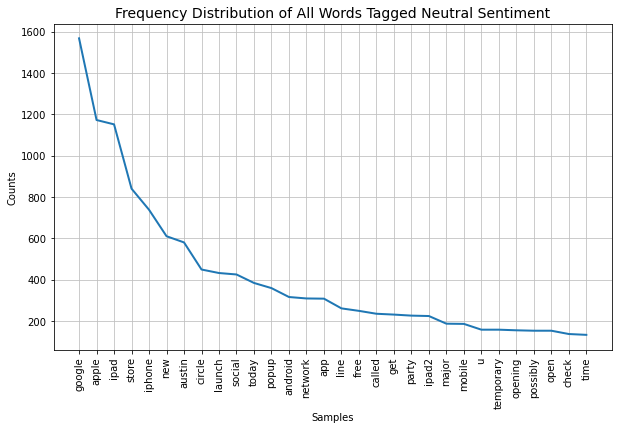

In [39]:
plot_fdist(sentiment="Neutral emotion", title="Frequency Distribution of All Words Tagged Neutral Sentiment")

- With respect to all the data categorised as 'neutral', the words 'google', 'apple', 'ipad' and 'store' appeared more frequently than all other words.

- This confirms the class imbalance in the dataset.

#### 6.1.4 Frequency Distribution of Lemmatized words categorized as Negative Emotion

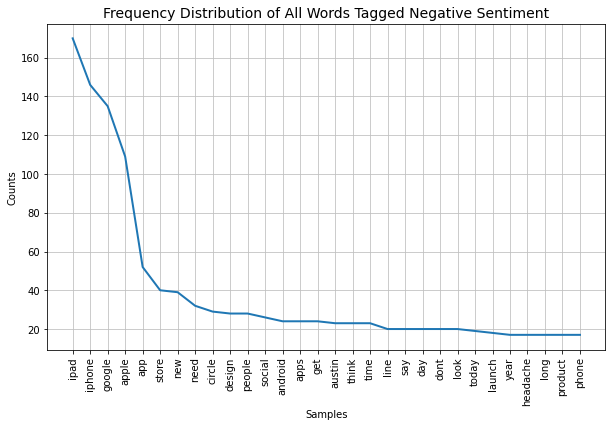

In [40]:
plot_fdist(sentiment="Negative emotion", title="Frequency Distribution of All Words Tagged Negative Sentiment")

- With respect to all the data categorised as 'negative', the words 'ipad', 'iphone', 'google' and 'apple' appeared more frequently than all other words. 

- But were less than the counts recorded in the Neutral Frequency Distributions.

## 7. Creating Biagrams
Analyzing bigrams enhances context by examining word pairs together, capturing phrases with meanings that differ from the individual words alone. This approach reveals insights into patterns, expressions, or common associations within the text, offering a deeper understanding of language context.

In [41]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

# Alias for BigramAssocMeasures
bigram_measures = BigramAssocMeasures()

In [42]:
def bigram_plots(sentiment=None, title="Bigram of The Data - All Sentiments", df=data, items=20):
    """
    This function returns a horizontal plot of the highest scored bigrams in the dataset
    """
    if sentiment == None:
        lemmatized_tweet = df['lemmatized_tweet']

        # Flatten the list
        flattened_lemmatized_tweet = [token for sublist in lemmatized_tweet for token in sublist]

    elif sentiment != None:
        lemmatized_tweet = df[df['emotion'] == sentiment]['lemmatized_tweet']

        # Flatten the list
        flattened_lemmatized_tweet = [token for sublist in lemmatized_tweet for token in sublist]

    # Create BigramCollocationFinder
    finder = BigramCollocationFinder.from_words(flattened_lemmatized_tweet)

    # Score bigrams by raw frequency
    scored = finder.score_ngrams(bigram_measures.raw_freq)

    # Display the 20 most common bigrams
#     for bigram, score in scored[:20]:
#         print(bigram, score)

    # Order the bigrams
    scores = sorted(scored[:items], key=lambda x: x[1])

    # labels and width
    labels, score = [b[0] + " " + b[1] for b, _ in scores], [score for _, score in scores]

    # Plot
    plt.figure(figsize=(10,6))
    plt.title(title, fontsize=14)
    plt.ylabel("Bigrams")
    plt.xlabel("Scores")
    plt.barh(y=labels, width=score);

### 7.1 Biagrams of all sentiments


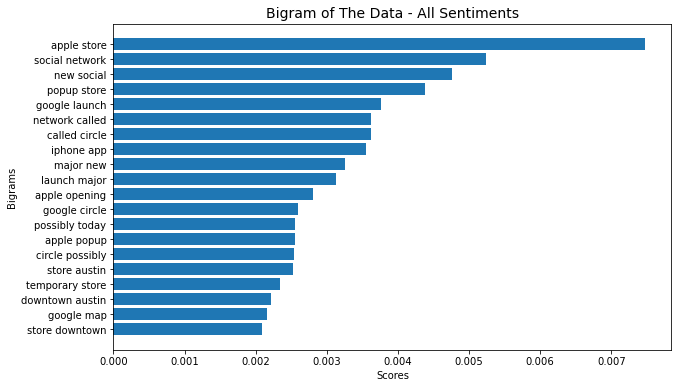

In [43]:
bigram_plots()

"apple store", "social network" and "new social" had the highest scores with respect to all the data available.

### 7.2 Biagrams Positive emotion

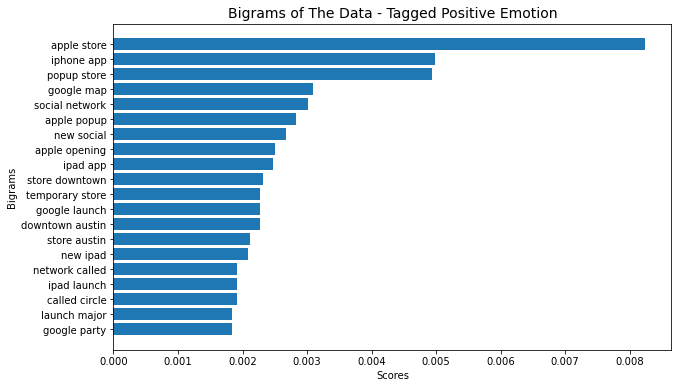

In [44]:
bigram_plots(sentiment='Positive emotion', title='Bigrams of The Data - Tagged Positive Emotion')

"apple store", "iphone app" and "popup store" had the highest scores with respect to all the data categorised as positive.


### 7.3 Biagrams of neutral emotion

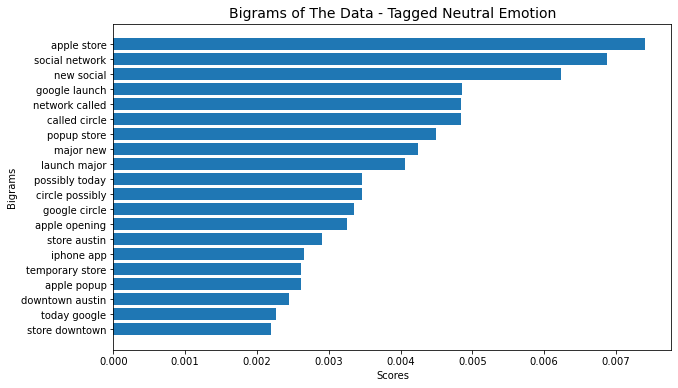

In [45]:
bigram_plots(sentiment='Neutral emotion', title='Bigrams of The Data - Tagged Neutral Emotion')

"apple store", "social network" and "new social" had the highest scores with respect to all the data categorised as neutral.

### 7.4 Biagrams of negative emotion

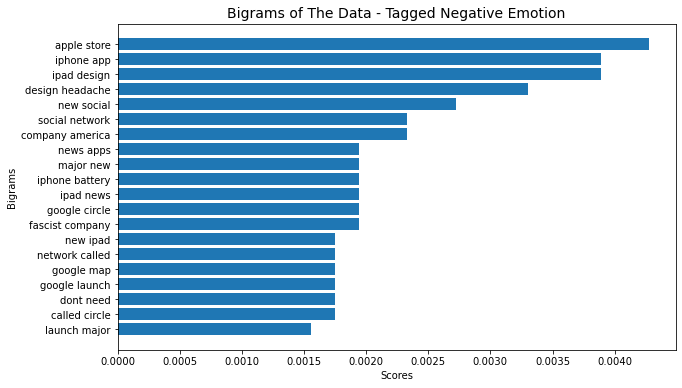

In [46]:
bigram_plots(sentiment='Negative emotion', title='Bigrams of The Data - Tagged Negative Emotion')

bigram_plots(sentiment='Negative emotion', title='Bigrams of The Data - Tagged Negative Emotion')

## 8. Wordcloud Visual

In [47]:
# installing wordCloud libraries
#!pip install wordcloud

from wordcloud import WordCloud

<Figure size 1440x1440 with 0 Axes>

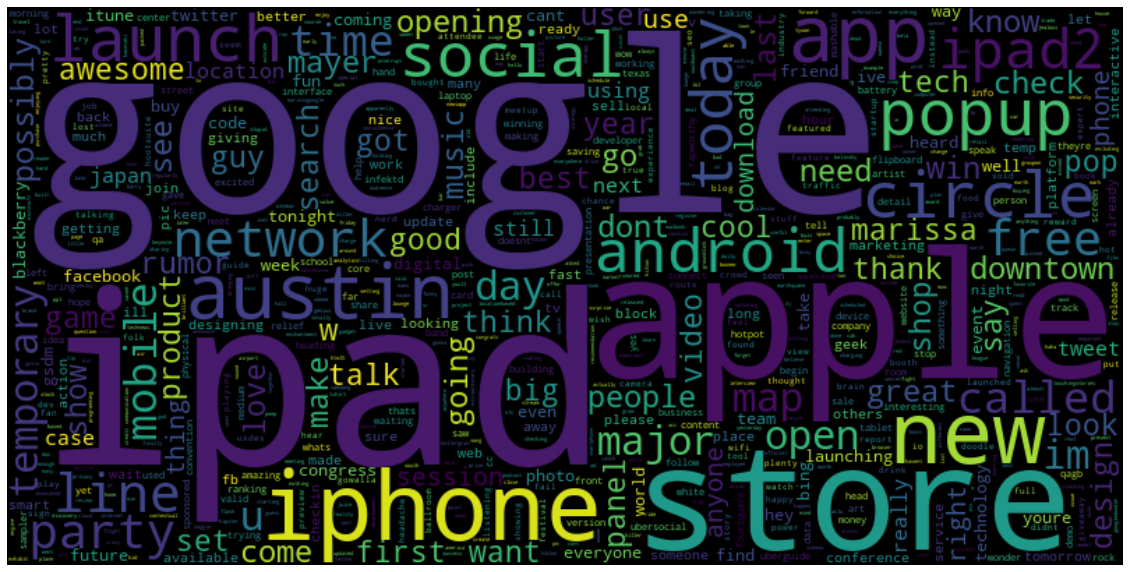

In [48]:
lemmatized_tweet = data['lemmatized_tweet']

# Flatten the list
flattened_lemmatized_tweet = [token for sublist in lemmatized_tweet for token in sublist]

# Use all processed text directly
data_neg = flattened_lemmatized_tweet[:len(flattened_lemmatized_tweet)]

# Create the word cloud
plt.figure(figsize = (20,20))
WordCloud = WordCloud(max_words = 1000 , width = 800 , height = 400,
               collocations=False).generate(" ".join(data_neg))

# Display the word cloud
plt.figure(figsize=(20, 20))
plt.imshow(WordCloud, interpolation = 'bilinear')
plt.axis('off')  # Hide axes
plt.show()

## 9. Modelling 

### 9.1 Preprocessing 

Prepare data for modeling by:

1. Label Encoding: Converted emotion labels into numerical values.
2. Vectorization: Used TF-IDF and CountVectorizer to transform text data into numerical vectors.
3. SMOTE: Applied SMOTE to handle class imbalance.
4. Train test split: To split the data

Benefits:

These steps facilitate machine learning algorithms to process the emotion variable, convert text into a numerical format for better analysis, ensure the model is not biased towards the majority class, and provide clear metrics to evaluate performance on unseen data.

#### 9.1.1 Label Encoding

In [49]:
# Classify the data
y = data['emotion']

# Label Enconde the target
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(y)
target[:5]

array([0, 2, 2, 0, 2])

In [50]:
# Confirm labels
label_encoder.classes_

array(['Negative emotion', 'Neutral emotion', 'Positive emotion'],
      dtype=object)

#### 9.1.2 Vectorization : CountVectorizer

In [51]:
# Vectorization - CV
cv = CountVectorizer()

X_vec = cv.fit_transform(data['clean_tweet'])
X_vec = pd.DataFrame.sparse.from_spmatrix(X_vec)
X_vec.columns = sorted(cv.vocabulary_)
X_vec.set_index(y.index, inplace=True)
X_vec = X_vec.iloc[:, 160:]


In [52]:
# Convert sparse to dense before resampling
X_vec = X_vec.sparse.to_dense()

In [53]:
# SMOTE - CV
smote = SMOTE()
X_cv_smote, y_cv_smote = smote.fit_resample(X_vec, target)


In [54]:
# Train Test and split - CV
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv_smote, y_cv_smote, test_size=0.3, random_state=42)

#### 9.1.3 Vectorization : TF-IDF

In [55]:
# Vectorization - TFIDF
tf = TfidfVectorizer()

X_tf = tf.fit_transform(data['clean_tweet'])
X_tf = pd.DataFrame.sparse.from_spmatrix(X_tf)
X_tf.columns = sorted(tf.vocabulary_)
X_tf.set_index(y.index, inplace=True)
X_tf = X_tf.iloc[:, 160:]

In [56]:
# Convert sparse to dense before resampling
X_tf = X_tf.sparse.to_dense()

In [57]:
# SMOTE - TFIDF
X_tf_smote, y_tf_smote = smote.fit_resample(X_tf, target)

In [58]:
# Train Test and Split - TFIDF
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf_smote, y_tf_smote, test_size=0.3, random_state=42)

### 9.2 Models

The machine learning algorithims used in this section are:

1. RandomForest
2. Naive Bayes(MultinomialNB)
3. LogisticRegression
4. DecisionTrees

We will use the split data to predict which model will achieve the highest accuracy and use it for deployment.

In [59]:
def modelling(model, cv=False, tf=False):
    if cv == True:
        # Fit the instantiated model
        model.fit(X_train_cv, y_train_cv)
        # Predict
        y_hat = model.predict(X_test_cv)
        # Results
        print("Count Vectorisation Results\n")
        print("Main Metrics")
        print("-"*12)
        print(f"Accuracy Score {round(accuracy_score(y_test_cv, y_hat), 3)}")
        # Use 'macro' averaging for multiclass classification
        print(f"Recall Score {round(recall_score(y_test_cv, y_hat, average='macro'), 3)}")
        # Classification Report
        print("\nClassification Report")
        print(classification_report(y_test_cv, y_hat))


    elif tf == True:
        # Fit the instantiated model
        model.fit(X_train_tf, y_train_tf)
        # Predict
        y_hat = model.predict(X_test_tf)
        # Results
        print("---------")
        print("TFIDF Vectorisation Results\n")
        print("Main Metrics")
        print("-"*12)
        print(f"Accuracy Score {round(accuracy_score(y_test_tf, y_hat), 3)}")
        # Use 'macro' averaging for multiclass classification
        print(f"Recall Score {round(recall_score(y_test_tf, y_hat, average='macro'), 3)}")
        # Classification Report
        print("\nClassification Report")
        print(classification_report(y_test_tf, y_hat))


In [60]:
def hyper_tuning(model, params, model_name="Random Forest"):
    """This function optimises the base model with the parameters
    passed as params"""
    # Grid Search Base Model
    grid_search_model = GridSearchCV(model, params, cv=5, scoring='accuracy')
    # Count Vectorisation
    # Perform grid search with 5-fold cross-validation for Count Vectorization
    grid_search_rf_cv = grid_search_model.fit(X_train_cv, y_train_cv)

    # Get the best model from grid search for Count Vectorization
    best_rf_model_cv = grid_search_rf_cv.best_estimator_

    # Predict on the test set using the best model for Count Vectorization
    y_pred_cv = best_rf_model_cv.predict(X_test_cv)

    # Calculate and print the accuracy for Count Vectorization
    accuracy_cv = accuracy_score(y_test_cv, y_pred_cv)

    # Calculate and print the recall for Count Vectorization
    recall_cv = recall_score(y_test_cv, y_pred_cv, average ='macro')

    # Results
    print("Count Vectorisation Results\n")
    print(f"Best {model_name.title()} Model (Count Vectorization):\n", best_rf_model_cv)
    print(f"\nTest Accuracy (Count Vectorization): {accuracy_cv:.3f}")
    print(f"\nTest Recall (Count Vectorization): {recall_cv:.3f}")
    print("---------")

    #TFIDF Vectorisation
    grid_search_rf_tf = grid_search_model.fit(X_train_tf, y_train_tf)

    # Get the best model from grid search for TF-IDF Vectorization
    best_rf_model_tf = grid_search_rf_tf.best_estimator_

    # Predict on the test set using the best model for TF-IDF Vectorization
    y_pred_tf = best_rf_model_tf.predict(X_test_tf)

    # Calculate and print the accuracy for TF-IDF Vectorization
    accuracy_tf = accuracy_score(y_test_tf, y_pred_tf)

    # Calculate and print the reacll for TF-IDF Vectorization
    recall_tf= recall_score(y_test_tf, y_pred_tf, average ='macro')

    # Results
    print("\n\nTFIDF Vectorisation Results\n")
    print(f"Best {model_name.title()} Model (TFIDF Vectorization):\n", best_rf_model_tf)
    print(f"\nTest Accuracy (TFIDF Vectorization): {accuracy_tf:.3f}")
    print(f"\nTest Recall (TFIDF Vectorization): {recall_tf:.3f}")

    # models = [best_rf_model_cv, best_rf_model_tf]

    return best_rf_model_cv, best_rf_model_tf

#### 9.2.1 Model 1: Random Forest Classifier


In [61]:
# Instantiate a random forest model
# Set `n_estimators = 1000` , `max_features = 5` and `max_depth = 5`
rf = RandomForestClassifier(n_estimators=1000, max_features=5, max_depth=5)

In [62]:
modelling(model=rf, cv=True)
modelling(model=rf, tf=True)

Count Vectorisation Results

Main Metrics
------------
Accuracy Score 0.487
Recall Score 0.49

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.20      0.32      1541
           1       0.74      0.38      0.50      1523
           2       0.39      0.90      0.54      1500

    accuracy                           0.49      4564
   macro avg       0.68      0.49      0.46      4564
weighted avg       0.68      0.49      0.45      4564

---------
TFIDF Vectorisation Results

Main Metrics
------------
Accuracy Score 0.703
Recall Score 0.703

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      1541
           1       0.79      0.38      0.52      1523
           2       0.54      0.91      0.67      1500

    accuracy                           0.70      4564
   macro avg       0.77      0.70      0.69      4564
weighted avg       0.77      0.70      0.70     

Hyperparameter tuning the Random Forest Classifier

In [63]:
# Define the Random Forest classifier
rf = RandomForestClassifier(random_state= 42)

# Define the parameter grid with the necessary hyperparameters
rf_param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30]   # Maximum depth of the tree
}

tuned_rf_cv_model, tuned_rf_tf_model = hyper_tuning(model=rf, params=rf_param_grid, model_name="Random Forest")

Count Vectorisation Results

Best Random Forest Model (Count Vectorization):
 RandomForestClassifier(n_estimators=200, random_state=42)

Test Accuracy (Count Vectorization): 0.709

Test Recall (Count Vectorization): 0.707
---------


TFIDF Vectorisation Results

Best Random Forest Model (TFIDF Vectorization):
 RandomForestClassifier(n_estimators=200, random_state=42)

Test Accuracy (TFIDF Vectorization): 0.837

Test Recall (TFIDF Vectorization): 0.836


 - The first output reflects performance from a basic/random configuration and the second output from a tuned configuration of the model. 

 - TF-IDF Vectorization paired with a tuned Random Forest Classifier is the most effective setup for this task, providing the highest accuracy of 0.837 and recall of 0.836 and demonstrating the importance of both optimal vectorization and model tuning for performance.

#### 9.2.2 Model 2: Naive Bayes / (MultinomialNB) model

In [64]:
# Instantiate the MultinomialNB model
mnb = MultinomialNB()

In [65]:
# Classification report of the multinomial using the Count Vectorization
modelling(model=mnb, cv=True)
# Classification report of the multinomial using the TFIDF Vectorization
modelling(model=mnb, tf=True)

Count Vectorisation Results

Main Metrics
------------
Accuracy Score 0.628
Recall Score 0.628

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      1541
           1       0.67      0.57      0.62      1523
           2       0.52      0.60      0.56      1500

    accuracy                           0.63      4564
   macro avg       0.64      0.63      0.63      4564
weighted avg       0.64      0.63      0.63      4564

---------
TFIDF Vectorisation Results

Main Metrics
------------
Accuracy Score 0.771
Recall Score 0.77

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1541
           1       0.74      0.59      0.66      1523
           2       0.71      0.75      0.73      1500

    accuracy                           0.77      4564
   macro avg       0.77      0.77      0.76      4564
weighted avg       0.77      0.77      0.76     

Hyperparameter tuning the (MultinomialNB) model

In [66]:
# params
mnb_param_grid = {
    'alpha': [0.01, 0.1]
}

# GridSearchCV for tuning
tuned_mnb_cv_model, tuned_mnb_tf_model = hyper_tuning(model=mnb, params=mnb_param_grid, model_name="MNB")

Count Vectorisation Results

Best Mnb Model (Count Vectorization):
 MultinomialNB(alpha=0.01)

Test Accuracy (Count Vectorization): 0.657

Test Recall (Count Vectorization): 0.656
---------


TFIDF Vectorisation Results

Best Mnb Model (TFIDF Vectorization):
 MultinomialNB(alpha=0.01)

Test Accuracy (TFIDF Vectorization): 0.800

Test Recall (TFIDF Vectorization): 0.799


- TF-IDF Vectorization paired with a tuned MNB model is the most effective setup for this task, providing the highest accuracy of 0.800 and recall of 0.799 and demonstrating the importance of both optimal vectorization and model tuning for performance.

- This further confirms the importance of pairing TF-IDF Vectorization and a tuned model to achieve better effectiveness of a model.

#### 9.2.3 Model 3: Logistic Regression


In [67]:
# Instantiate the Logistic Regression Model
lr = LogisticRegression(max_iter=200)

In [68]:
modelling(model=lr, cv=True)
modelling(model=lr, tf=True)

Count Vectorisation Results

Main Metrics
------------
Accuracy Score 0.703
Recall Score 0.702

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.91      0.81      1541
           1       0.71      0.65      0.68      1523
           2       0.65      0.55      0.60      1500

    accuracy                           0.70      4564
   macro avg       0.70      0.70      0.69      4564
weighted avg       0.70      0.70      0.70      4564

---------
TFIDF Vectorisation Results

Main Metrics
------------
Accuracy Score 0.815
Recall Score 0.814

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1541
           1       0.74      0.75      0.74      1523
           2       0.78      0.72      0.75      1500

    accuracy                           0.82      4564
   macro avg       0.81      0.81      0.81      4564
weighted avg       0.81      0.82      0.81    

In [69]:
# A secondary model manually tuned
lr_tune = LogisticRegression(max_iter=3000, C=100, solver='liblinear')
modelling(lr_tune, cv=True)
modelling(lr_tune, tf=True)

Count Vectorisation Results

Main Metrics
------------
Accuracy Score 0.702
Recall Score 0.7

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.91      0.83      1541
           1       0.69      0.64      0.67      1523
           2       0.64      0.55      0.59      1500

    accuracy                           0.70      4564
   macro avg       0.69      0.70      0.69      4564
weighted avg       0.70      0.70      0.69      4564

---------
TFIDF Vectorisation Results

Main Metrics
------------
Accuracy Score 0.827
Recall Score 0.826

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1541
           1       0.77      0.71      0.74      1523
           2       0.76      0.78      0.77      1500

    accuracy                           0.83      4564
   macro avg       0.82      0.83      0.82      4564
weighted avg       0.82      0.83      0.82      

Hyperparameter Tuning Logistic Regression Model

In [70]:
# Parameter Tuning
c_space = np.linspace(30, 32, 3)
max_iters = [100, 150, 200]
solvers = ["lbfgs", "liblinear"]
lr_param_grid = { 'C': c_space, 'max_iter':max_iters }
tuned_lr_cv_model, tuned_lr_tf_model = hyper_tuning(model=lr, params=lr_param_grid, model_name="Logistic Regression")

Count Vectorisation Results

Best Logistic Regression Model (Count Vectorization):
 LogisticRegression(C=32.0)

Test Accuracy (Count Vectorization): 0.709

Test Recall (Count Vectorization): 0.708
---------


TFIDF Vectorisation Results

Best Logistic Regression Model (TFIDF Vectorization):
 LogisticRegression(C=31.0, max_iter=150)

Test Accuracy (TFIDF Vectorization): 0.827

Test Recall (TFIDF Vectorization): 0.826


- TF-IDF Vectorization paired with a tuned Logistic Regression model is the most effective setup for this task, providing the highest accuracy of 0.827 and recall of 0.826 and demonstrating the importance of both optimal vectorization and model tuning for performance.

- The basic model and tuned model- paired with TF-IDF Vectorization, however, do not have much difference.

#### 9.2.4 Model 4: Decision Trees

In [71]:
#  Instantiate the Decision tree model
dt = DecisionTreeClassifier(max_features=5)

In [72]:
modelling(dt, cv=True)
modelling(dt, tf=True)

Count Vectorisation Results

Main Metrics
------------
Accuracy Score 0.684
Recall Score 0.683

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.92      0.81      1541
           1       0.68      0.59      0.63      1523
           2       0.63      0.55      0.58      1500

    accuracy                           0.68      4564
   macro avg       0.68      0.68      0.67      4564
weighted avg       0.68      0.68      0.68      4564

---------
TFIDF Vectorisation Results

Main Metrics
------------
Accuracy Score 0.759
Recall Score 0.757

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1541
           1       0.67      0.71      0.69      1523
           2       0.71      0.63      0.67      1500

    accuracy                           0.76      4564
   macro avg       0.76      0.76      0.76      4564
weighted avg       0.76      0.76      0.76    

In [73]:
# A secondary model manually tuned
dt2 = DecisionTreeClassifier(max_depth=1000 , criterion='entropy', min_samples_split=4, min_samples_leaf=5)
modelling(dt2, cv=True)
modelling(dt2, tf=True)

Count Vectorisation Results

Main Metrics
------------
Accuracy Score 0.642
Recall Score 0.64

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.88      0.76      1541
           1       0.62      0.57      0.59      1523
           2       0.62      0.48      0.54      1500

    accuracy                           0.64      4564
   macro avg       0.64      0.64      0.63      4564
weighted avg       0.64      0.64      0.63      4564

---------
TFIDF Vectorisation Results

Main Metrics
------------
Accuracy Score 0.724
Recall Score 0.723

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1541
           1       0.65      0.65      0.65      1523
           2       0.65      0.63      0.64      1500

    accuracy                           0.72      4564
   macro avg       0.72      0.72      0.72      4564
weighted avg       0.72      0.72      0.72     

Hyper Parameter Tuning the Decision Tree Model

In [74]:
dt_param_grid = {"criterion": ['gini', 'entropy'],
                 "max_features" : [5],
                 "min_samples_split":[4, 5, 6]}

tuned_dt_cv_model, tuned_dt_tf_model = hyper_tuning(model=dt, params=dt_param_grid, model_name="Decision Tree")

Count Vectorisation Results

Best Decision Tree Model (Count Vectorization):
 DecisionTreeClassifier(max_features=5, min_samples_split=5)

Test Accuracy (Count Vectorization): 0.679

Test Recall (Count Vectorization): 0.677
---------


TFIDF Vectorisation Results

Best Decision Tree Model (TFIDF Vectorization):
 DecisionTreeClassifier(max_features=5, min_samples_split=4)

Test Accuracy (TFIDF Vectorization): 0.765

Test Recall (TFIDF Vectorization): 0.764


 - TF-IDF Vectorization paired with a tuned Decision tree model is the most effective setup for this task, providing the highest accuracy of 0.765 and recall of 0.764 and demonstrating the importance of both optimal vectorization and model tuning for performance.

 - Overall the models, Decision trees model recorded the __lowest__ accuracy and recall scores after tuning and using TFIDF Vectorisation.

## 10. Evaluation & Deployment

### 10.1 Saving in Pickle files
Model deployment is the process of making a machine learning model available for use in a production environment where it can make predictions on new data.

In [75]:
# Convert the trained model into a format suitable for deployment
pickle_models = [tuned_mnb_tf_model, tuned_rf_tf_model, tuned_dt_tf_model, tuned_lr_tf_model]
pickle_names = ["tuned_mnb_tf_model.pkl", "tuned_rf_tf_model.pkl", "tuned_dt_tf_model.pkl",
                "tuned_lr_tf_model.pkl"]

for name, model in zip(pickle_names, pickle_models):
  pickle.dump(model, open(name, 'wb'))

# The Product categories
products = list(data.emotion.unique())
pickle.dump(products, open('products.pkl', 'wb'))



### 10.2 Evaluation

In [76]:
# TFIDF Models used
models = ['RandomForest', 'Tuned RandomForest',
          'MultinomialNB', 'Tuned MultinomialNB',
          'LogisticRegression', 'Tuned LogisticRegression',
          'Decision Tree', 'Tuned Decision Tree']


# Scores
model_accuracy_scores = [0.733, 0.840, 0.767, 0.798, 0.805, 0.828, 0.751, 0.761]
model_recall_scores =   [0.733, 0.839, 0.767, 0.797, 0.804, 0.827, 0.750, 0.760]


# Now proceed with other operations on `df`
evaluation_df = pd.DataFrame(data={
    "models": models,
    "accuracy": model_accuracy_scores,
    "recall": model_recall_scores
})
evaluation_df.sort_values(by='accuracy', ascending=True, inplace=True)

In [77]:
# The Model Evaluation Results
pickle.dump(evaluation_df, open('evaluation_df.pkl', 'wb'))

# Save the labels
pickle.dump(label_encoder.classes_, open("./models/labels.pkl", 'wb'))

### 10.3 Prediction Process
In this section we will save the fitted vectorizer, fitted model and returns the labels.

In [82]:
import os
import pickle
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Load pre-trained TF-IDF vectorizer
vectorizer_path = './models/vectorizer.pkl'
if os.path.exists(vectorizer_path):
    with open(vectorizer_path, 'rb') as file:
        vectorizer = pickle.load(file)
else:
    raise FileNotFoundError(f"Vectorizer file not found at {vectorizer_path}")

# Load the pre-trained random forest model
model_path = './pickle_names/tuned_rf_tf_model.pkl'
if os.path.exists(model_path):
    with open(model_path, 'rb') as file:
        model = pickle.load(file)
else:
    raise FileNotFoundError(f"Model file not found at {model_path}")

# Load the label encoder
label_encoder_path = './models/labels.pkl'
if os.path.exists(label_encoder_path):
    with open(label_encoder_path, 'rb') as file:
        label_encoder = pickle.load(file)
else:
    raise FileNotFoundError(f"Label encoder file not found at {label_encoder_path}")

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocessing function for incoming text
def preprocess_text(text):
    # Convert to lower case
    text = text.lower()
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove punctuation, stop words, and lemmatize
    cleaned_tokens = [
        lemmatizer.lemmatize(token) 
        for token in tokens 
        if token not in string.punctuation and token not in stop_words
    ]
    
    return ' '.join(cleaned_tokens)


In [85]:
# Example text for prediction
text = "I hate using the ipad."

# Preprocess the text
cleaned_text = preprocess_text(text)

# Transform the cleaned text to TF-IDF representation
text_tfidf = vectorizer.transform([cleaned_text])

# Make prediction using the loaded random forest model
prediction = model.predict(text_tfidf)

# Check if label_encoder is a LabelEncoder with inverse_transform method
if hasattr(label_encoder, "inverse_transform"):
    # Decode the predicted label using inverse_transform
    predicted_label = label_encoder.inverse_transform(prediction)
else:
    # If label_encoder is an array or list, index directly
    predicted_label = label_encoder[prediction[0]]

# Return sentiment label
print(predicted_label[0] if isinstance(predicted_label, list) else predicted_label)


Negative emotion


## 11. Key Findings 

We explored the effectiveness of various machine learning models to predict the sentiment of tweets about Apple and Google products. Our data was preprocessed by label encoding the emotion labels, applying SMOTE to address class imbalance, vectorizing the text data using both CountVectorizer and TF-IDF. We then evaluated the performance of the models including RandomForest, Naive Bayes (MultinomialNB), Logistic Regression, and Decision Trees, and conducted hyperparameter tuning to optimize their performance.

The best model was found to be __Random Forest Classifier.__

- __Vectorization:__

TF-IDF Vectorization consistently outperformed CountVectorizer in all models. It has demonstrated its superior capability in feature representation for sentiment analysis.

- __Model Performance:__

Tuned Random Forest classifier model achieved the highest accuracy and recall scores with TF-IDF vectorization, both scoring approximately __83.7%__ in accuracy and __83.6%__ in recall. Tuned MultinomialNB model also performed well, reaching an accuracy score of __80%__ and recall score of __79.9%__.

- __Hyperparameter Tuning:__

Hyperparameter tuning significantly improved model performance, as seen in the models where accuracy and recall improved by more than 10% in some cases.

- __Class Imbalance:__

Applying SMOTE was effective in handling class imbalance, ensuring that the models did not bias towards the majority class and provided balanced performance across all emotion categories.

## 12. Reccomendations 

Based on the findings, here are some recommendations for future work and practical application:

__Monitoring Negative Sentiments:__

Implement real-time monitoring and alert systems to flag negative sentiments as they arise. This allows for prompt intervention and resolution of customer issues.

__Scalability:__

Assess the scalability of the models for handling large-scale data in a production environment. Optimize the models for performance and efficiency to ensure they can process a high volume of tweets quickly and accurately.

__Real-Time Processing:__

Explore real-time processing capabilities to provide up-to-date sentiment analysis, which is crucial for timely decision-making and responding to emerging trends.

__Continuous Model Monitoring:__

Implement continuous monitoring of the deployed models to detect any performance degradation over time. Retrain the models if necessary with new data to maintain accuracy and relevance.

__Integration with Social Media Platforms:__

Integrate the sentiment analysis models with social media platforms' APIs for seamless data collection and analysis, enabling continuous monitoring and real-time insights.

## 13. Next Steps 

To enhance the SentimentFlow project, the following steps are recommended:

__Model Validation:__

Validate the chosen models on an independent test set to ensure their generalizability and robustness. Use more advanced models such as BERT, Deep Neural Network and LSTM models. Because of their efficiency

__User Feedback:__

Incorporate user feedback to iteratively improve the model's performance and adjust based on real-world usage scenarios.

__Scalability:__

Assess the scalability of the models for handling large-scale data in a production environment, optimizing for performance and efficiency.

__Continuous Monitoring:__

Implement continuous monitoring of the deployed models to detect any performance degradation over time and retrain models as necessary with new data.

__Visualization and Reporting:__

Develop comprehensive visualization and reporting tools to provide insights into sentiment trends over time, helping stakeholders make informed decisions.

__Future Work__

- Data Expansion: Collect tweets from different geographical areas to understand regional sentiment variations. Scrape more and recent data from X to understand the different timelines to understand the public sentiments towards apple and google over time. This will provide up to date public opinion of the products.

- Model Enhancements: Investigating more sophisticated models or algorithms to further improve accuracy and recall.

- Real-Time Processing Capabilities: Developing solutions for real-time sentiment analysis to provide timely insights and responses.

## 14. Conclusion 

__Summary of Findings:__

The project successfully evaluated various machine learning models for classifying tweets into emotion categories. TF-IDF Vectorization demonstrated superior performance compared to CountVectorizer, and the __Tuned Random Forest model__ achieved the highest accuracy and recall. Hyperparameter tuning significantly enhanced model performance, and the SMOTE technique effectively addressed class imbalance.

__Project Impact:__

The project’s results offer valuable insights into effective sentiment analysis for social media data. The models developed provide robust tools for classifying tweets and understanding public sentiment, contributing to advancements in sentiment analysis and machine learning applications.

__Final Thoughts:__

The project highlights the importance of effective data preprocessing, model evaluation, and hyperparameter tuning in achieving high-performance sentiment analysis. The findings emphasize the potential of machine learning models in practical applications and pave the way for future research and enhancements in the field.